**Importando bibliotecas**

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Construindo Visualização**

In [2]:
def plotid(t, I, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, I, 'k', alpha=0.7, linewidth=4, label='Infected')
  ax.plot(t, D, 'r', alpha=0.7, linewidth=4, label='Dead')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
 
 # Plotando o pico de Infectados
  ymax = max(I)
  xmax = t[np.argmax(I)]
  text= "{:.0f} Infectados \n{:.0f} dias.".format(ymax, xmax)
  bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
  ax.annotate(text, xy=(xmax, ymax), bbox=(bbox_props))

 # Plotando o pico de mortos
  ymax = max(D)
  xmax = t[np.argmax(D)]
  text = "{:.0f} mortos \n{:.0f} dias.".format(ymax, xmax)
  bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
  ax.annotate(text, xy=(xmax, ymax), bbox=(bbox_props))

  return plt.show();

**Definição das Variáveis**

In [3]:
N = 1000000
D = 4.0 # infections lasts four days
gamma = 1.0 / D # rate of recovering per day
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 1.4 # Number of people a infected will infect
beta = R_0 / D  # Number of people a infected will infect per day
alpha = 0.1  # 5% death rate
p = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 0, 1, 0, 0  # initial conditions: S_Susceptible, E_Exposed, I_Infectious, R_Recovered, D_Dead

**Calculo das Derivadas e Integral**

In [4]:
def deriv(y, t, N, beta, gamma, delta, alpha, p):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * p * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * p * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

t = np.linspace(0, 200, 200) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, p))
S, E, I, R, D = ret.T

**Simulação**

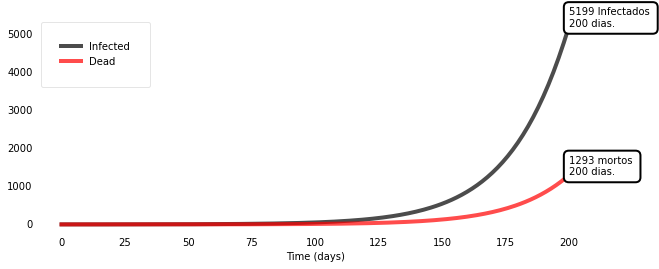

In [5]:
plotid(t, I, D)